### **1. Importing Libraries**

In [88]:
import pandas as pd                                                 # Importing for panel data analysis
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface of matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#--------------------~-----------------------------------------------------------------------------------------------------------
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN 
from sklearn.cluster import KMeans
from sklearn import metrics
#--------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

### **2. Data Preprocessing**
- Here we try to understand our data and preprocess it to the desirable format.
- All the observations are written in bullet points in markdown.

In [89]:
# Import training data into pandas dataframe
compact_df = pd.read_csv('./Dataset/Dataset2/Compact.csv')
print('Shape of the dataset:', compact_df.shape)
compact_df.head(3)

Shape of the dataset: (400, 2)


,x1,x2
0,-50.298667,31.489949
1,-45.591237,35.838229
2,-52.628892,35.305813


In [90]:
compact_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      400 non-null    float64
 1   x2      400 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB


In [91]:
# get statistics for all columns
compact_df.describe().loc[['min', 'max', 'mean', 'std']].round(2)

,x1,x2
min,-54.45,-33.99
max,29.89,40.37
mean,-11.68,6.17
std,28.59,25.73


----

In [92]:
# Import training data into pandas dataframe
skewed_df = pd.read_csv('./Dataset/Dataset2/Skewed.csv')
print('Shape of the dataset:', skewed_df.shape)
skewed_df.head(3)

Shape of the dataset: (925, 2)


,x1,x2
0,-0.450040,11.207204
1,-1.065648,-1.923373
2,0.829499,-1.000498


In [93]:
skewed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      925 non-null    float64
 1   x2      925 non-null    float64
dtypes: float64(2)
memory usage: 14.6 KB


In [94]:
# get statistics for all columns
skewed_df.describe().loc[['min', 'max', 'mean', 'std']].round(2)

,x1,x2
min,-14.79,-15.93
max,13.84,25.95
mean,-0.18,2.75
std,5.17,7.68


----

In [95]:
# Import training data into pandas dataframe
subclusters_df = pd.read_csv('./Dataset/Dataset2/Subclusters.csv')
print('Shape of the dataset:', subclusters_df.shape)
subclusters_df.head(3)

Shape of the dataset: (400, 2)


,x1,x2
0,-14.952995,-0.285601
1,-17.406881,3.495200
2,-14.122142,0.712242


In [96]:
subclusters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      400 non-null    float64
 1   x2      400 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB


In [97]:
# get statistics for all columns
subclusters_df.describe().loc[['min', 'max', 'mean', 'std']].round(2)

,x1,x2
min,-20.98,-12.28
max,30.20,17.46
mean,4.86,3.04
std,17.32,8.97


----

In [98]:
# Import training data into pandas dataframe
wellSeparated_df = pd.read_csv('./Dataset/Dataset2/wellSeperated.csv')
print('Shape of the dataset:', wellSeparated_df.shape)
wellSeparated_df.head(3)

Shape of the dataset: (335, 2)


,x1,x2
0,516.012706,393.014514
1,436.211762,408.656585
2,512.052601,372.022014


In [99]:
wellSeparated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      335 non-null    float64
 1   x2      335 non-null    float64
dtypes: float64(2)
memory usage: 5.4 KB


In [100]:
# get statistics for all columns
wellSeparated_df.describe().loc[['min', 'max', 'mean', 'std']].round(2)

,x1,x2
min,416.82,201.33
max,698.54,472.04
mean,576.77,349.08
std,78.85,68.32


----

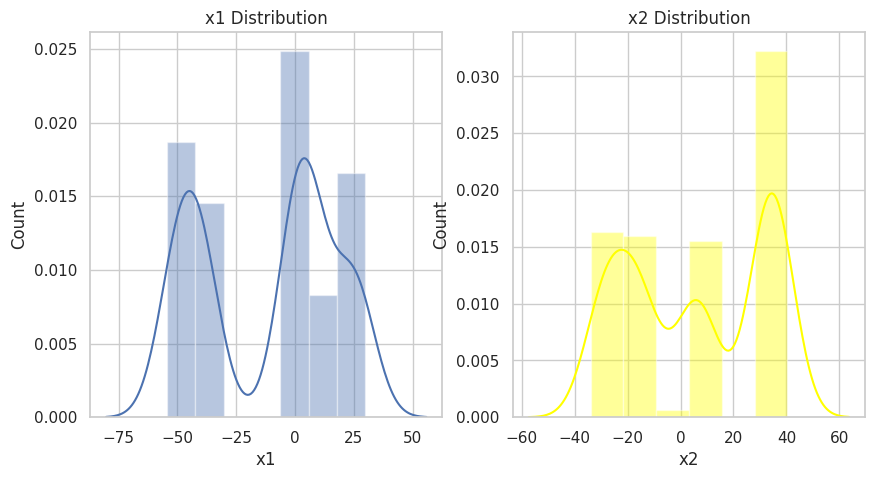

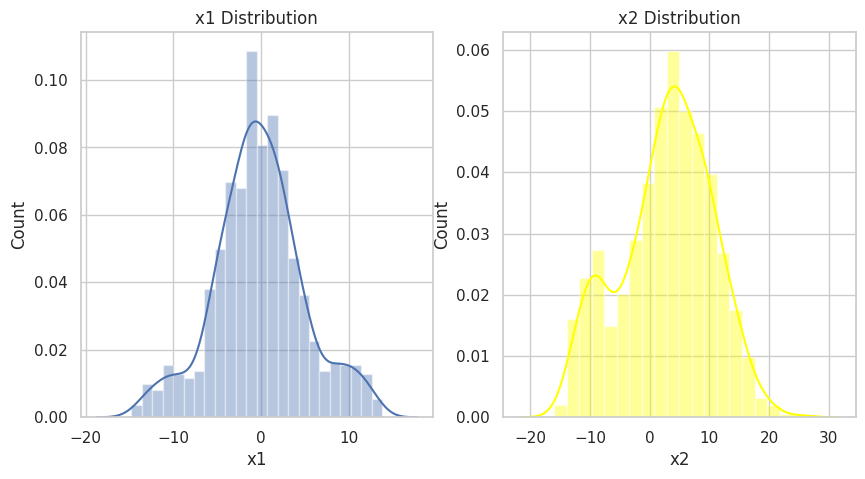

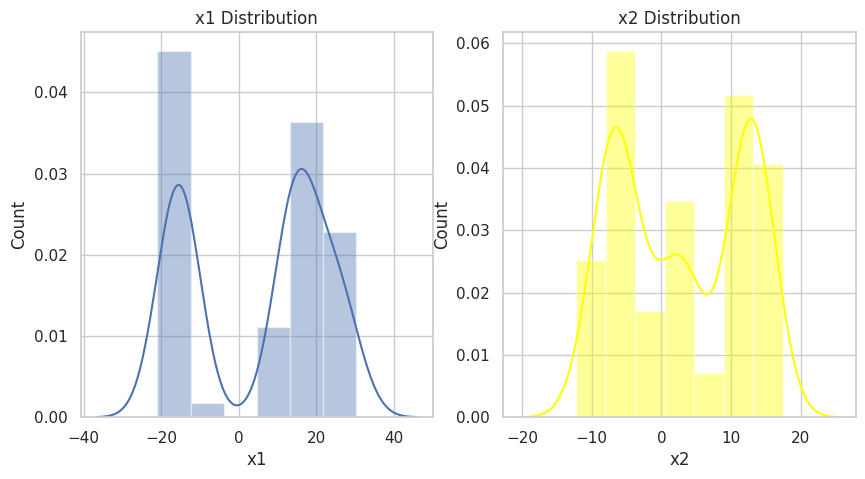

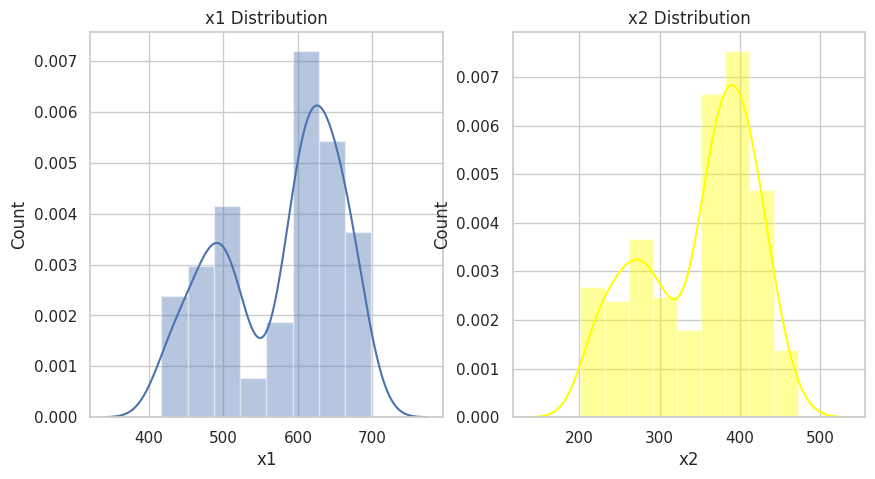

'\n- Data distribution for the data:\n    - compact_df\n    - skewed_df\n    - subclusters_df\n    - wellSeparated_df\n'

In [101]:
def dist(dataframe):
    plt.rcParams['figure.figsize'] = (10, 5)

    plt.subplot(1, 2, 1)
    sns.set(style = 'whitegrid')
    sns.distplot(dataframe['x1'])
    plt.title('x1 Distribution', fontsize = 12)
    plt.xlabel('x1')
    plt.ylabel('Count')


    plt.subplot(1, 2, 2)
    sns.set(style = 'whitegrid')
    sns.distplot(dataframe['x2'], color = 'yellow')
    plt.title('x2 Distribution', fontsize = 12)
    plt.xlabel('x2')
    plt.ylabel('Count')
    plt.show()

df_list = [compact_df ,skewed_df, subclusters_df, wellSeparated_df]
for dataframe in df_list:
    dist(dataframe)

'''
- Data distribution for the data:
    - compact_df
    - skewed_df
    - subclusters_df
    - wellSeparated_df
'''

----

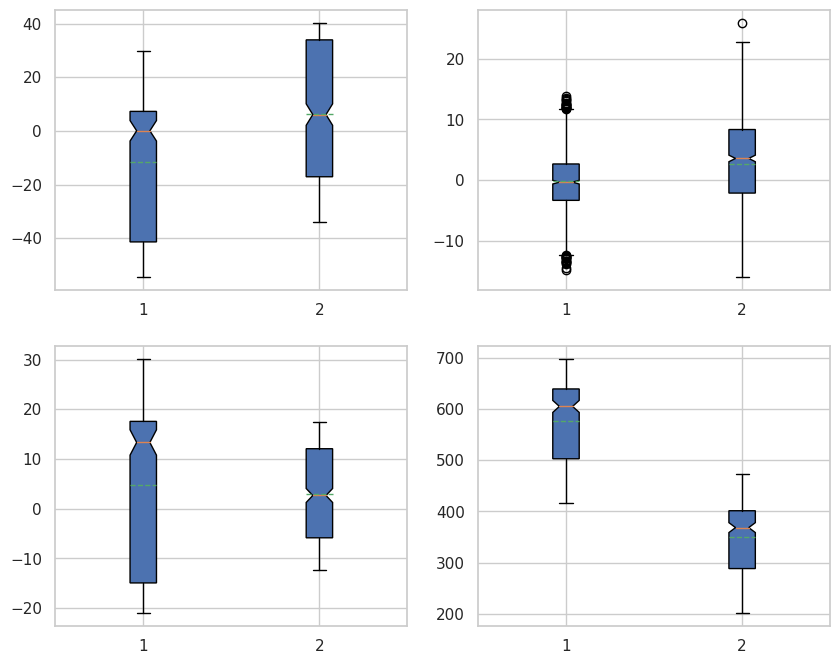

'\n- Data distribution for the data:\n    - compact_df      - skewed_df\n    - subclusters_df  - wellSeparated_df\n'

In [102]:
df_list = [compact_df , skewed_df, subclusters_df, wellSeparated_df]

columns = [[compact_df["x1"], compact_df['x2']], [skewed_df["x1"], skewed_df['x2']], [subclusters_df["x1"], subclusters_df['x2']], [wellSeparated_df["x1"], wellSeparated_df['x2']]]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

count=0
for row in ax:
    for col in row:
        col.boxplot(columns[count], notch=True, patch_artist=True, meanline=True, showmeans=True)
        count+=1
plt.show()

'''
- Data distribution for the data:
    - compact_df      - skewed_df
    - subclusters_df  - wellSeparated_df
'''

----

#### Let's analyze the relationship of the two attributes.
- For the total number of samples, let's analyze how each of the 4 dataset's points are spread in the space.

'\n- Data distribution for the data:\n    - compact_df      - skewed_df\n    - subclusters_df  - wellSeparated_df\n'

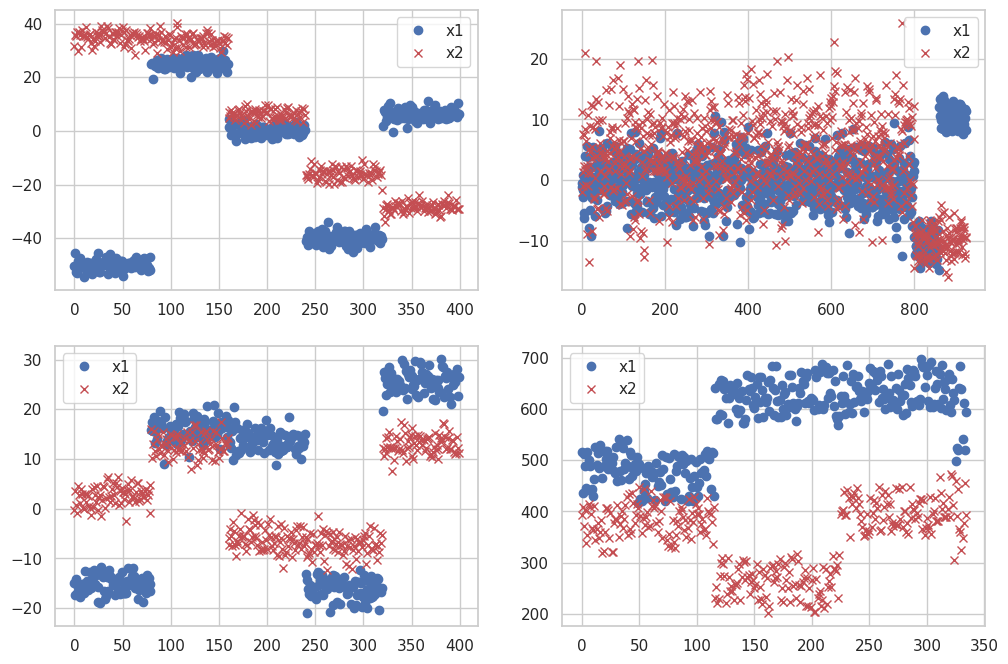

In [103]:
# Define number of rows and columns for subplots
nrow=2
ncol=2

# Make a list of all dataframes 
df_list = [compact_df ,skewed_df, subclusters_df, wellSeparated_df]
fig, axes = plt.subplots(nrow, ncol, figsize=(12, 8))

# Plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot(ax=axes[r,c], style=['o','rx'])
        count+=1

'''
- Data distribution for the data:
    - compact_df      - skewed_df
    - subclusters_df  - wellSeparated_df
'''

----

- Let's plot x1 vs x2 of the 4 dataset's points (helps us gain an intuitive sense of clusters if any).

'\n- Data distribution for the data:\n    - compact_df      - skewed_df\n    - subclusters_df  - wellSeparated_df\n'

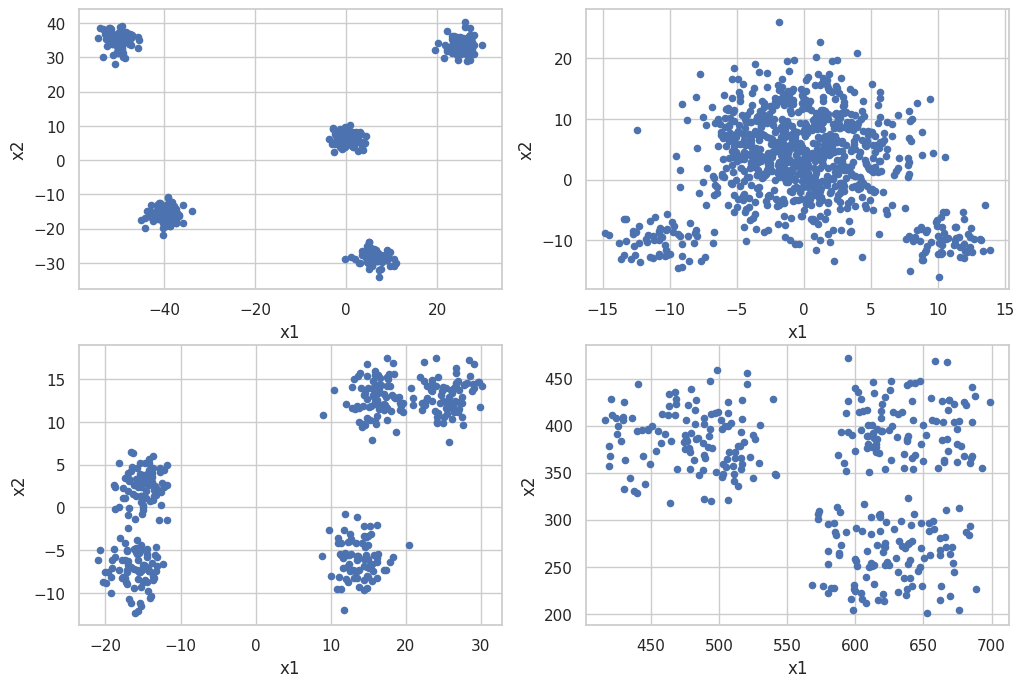

In [104]:
# Define number of rows and columns for subplots
nrow=2
ncol=2

# Make a list of all dataframes 
df_list = [compact_df ,skewed_df, subclusters_df, wellSeparated_df]
fig, axes = plt.subplots(nrow, ncol, figsize=(12, 8))

# Plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot(x='x1', y='x2', kind="scatter", ax=axes[r][c])
        count+=1

'''
- Data distribution for the data:
    - compact_df      - skewed_df
    - subclusters_df  - wellSeparated_df
'''

----

### **3. KMeans**

In [105]:
# Let's Implement elbow method from scratch
def elbow(X, init_method):
    # Let's Perform K-means clustering with certain values of K. 
    # For each value of K, let's compute the average distance to the centroid across all the data points
    mean_dist = []
    K = range(1,10)
    for k in K:
        kmean_model = KMeans(n_clusters=k, init=init_method).fit(X)
        kmean_model.fit(X)
        mean_dist.append(sum(np.min(cdist(X, kmean_model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

    for i in range(0, len(mean_dist)):
        print(f" For k {i}: value is {mean_dist[i]}")

    # Let's Plot the elbow curve
    plt.plot(K, mean_dist, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('Elbow Method For Optimal k')
    plt.show()

In [106]:
#Let's Implement silhouette method from scratch
def silhouette(X, init_method):
    mean_sil = []
    range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

    for k in range_n_clusters:
        kmeans = KMeans(n_clusters = k, init=init_method).fit(X)
        labels = kmeans.labels_
        mean_sil.append(silhouette_score(X, labels, metric = 'euclidean'))

    plt.plot(range_n_clusters,mean_sil,'bx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette Method For Optimal k')
    plt.show()

In [107]:
# Let's Visualize the clusters formed by Kmeans.
def visualize_clusters(dataframe, no_of_clusters):
    # Initialize the class object
    kmeans = KMeans(n_clusters= no_of_clusters)

    # Predict the labels of clusters.
    label = kmeans.fit_predict(dataframe)

    # Getting the Centroids
    centroids = kmeans.cluster_centers_

    # Getting unique labels
    u_labels = np.unique(label)

    # Plotting the results:
    for i in u_labels:
        plt.scatter(dataframe[label == i , 0] , dataframe[label == i , 1] , label = i)
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
    plt.legend()
    plt.show()

In [108]:
# Normalize the data
compact_df = StandardScaler().fit_transform(compact_df[['x1', 'x2']])
# compact_df

 For k 0: value is 1.329198825824042
 For k 1: value is 1.0415965707408719
 For k 2: value is 0.6337261825907338
 For k 3: value is 0.3315185182964698
 For k 4: value is 0.0919941365895952
 For k 5: value is 0.08758369096277976
 For k 6: value is 0.08283730076254887
 For k 7: value is 0.07869602964485004
 For k 8: value is 0.0754697896951738


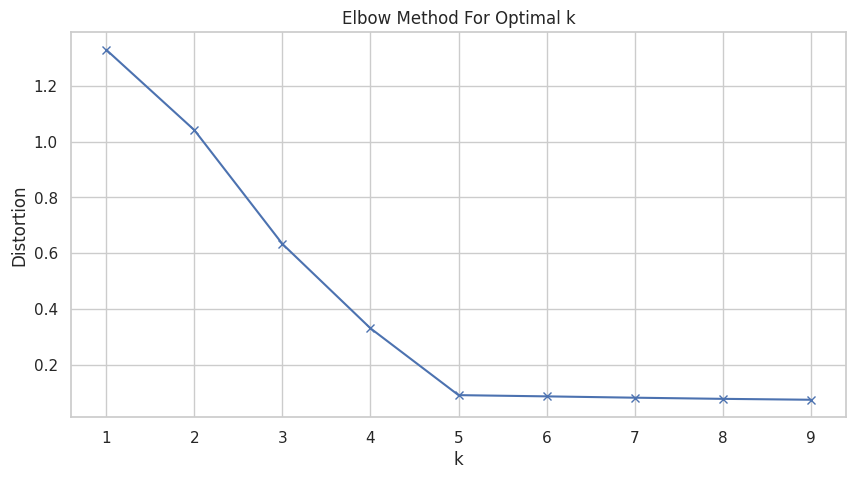

In [109]:
# Find optimal number of clusters using Elbow method
elbow(compact_df, "k-means++")

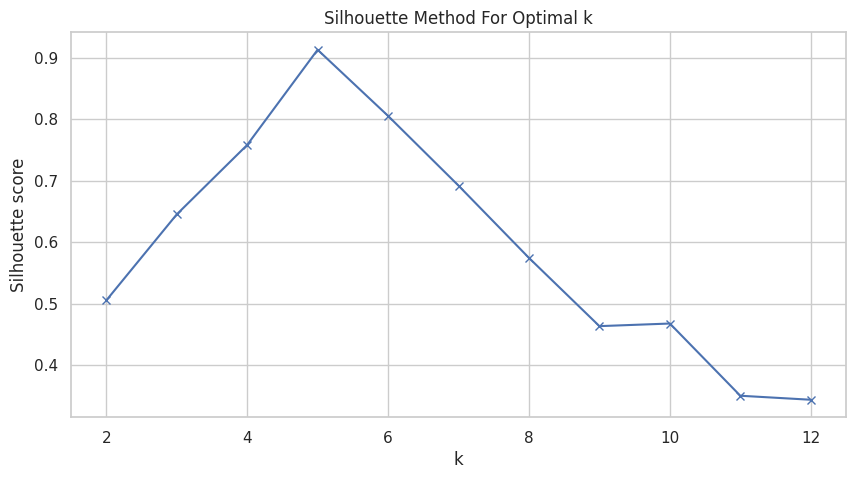

In [110]:
silhouette(compact_df, "k-means++")

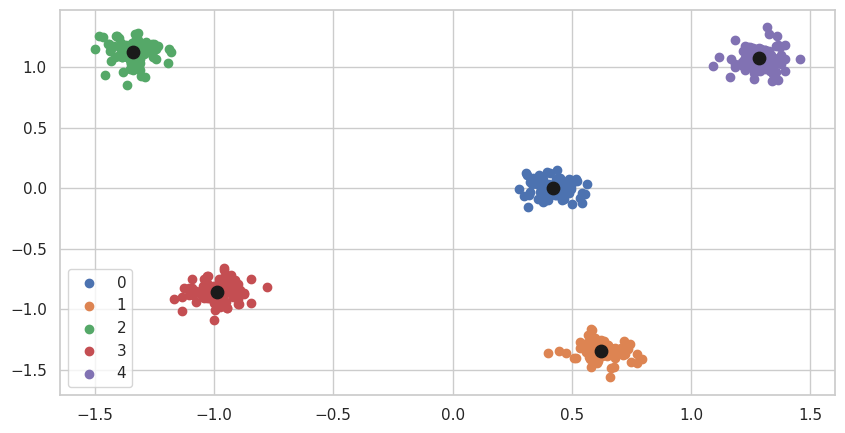

In [111]:
# Visualize the clusters using the optimal number found.
visualize_clusters(compact_df, 5)

----

In [112]:
skewed_df = StandardScaler().fit_transform(skewed_df[['x1', 'x2']])
# skewed_df

 For k 0: value is 1.1978846461584474
 For k 1: value is 0.9961015246377285
 For k 2: value is 0.8324863817821883
 For k 3: value is 0.696690279624228
 For k 4: value is 0.5907069672449423
 For k 5: value is 0.5236133533953814
 For k 6: value is 0.48219993633604785
 For k 7: value is 0.4471180875070829
 For k 8: value is 0.4211507917016736


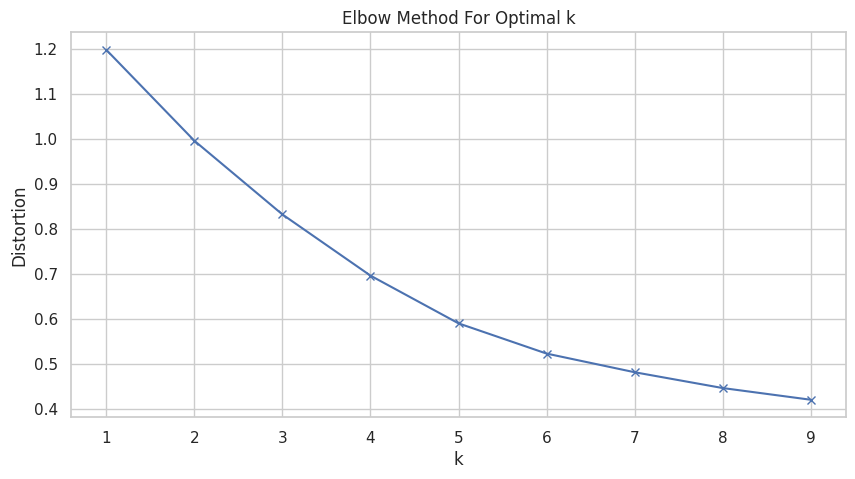

In [113]:
elbow(skewed_df, "k-means++")

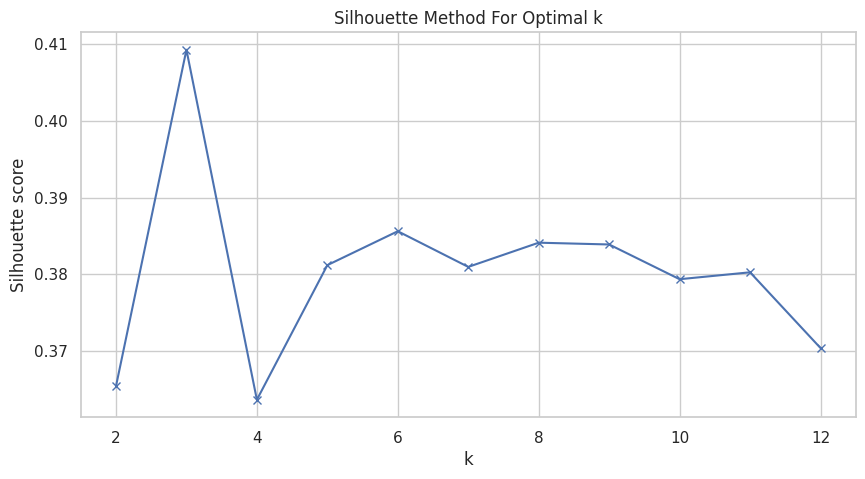

In [114]:
silhouette(skewed_df, "k-means++")

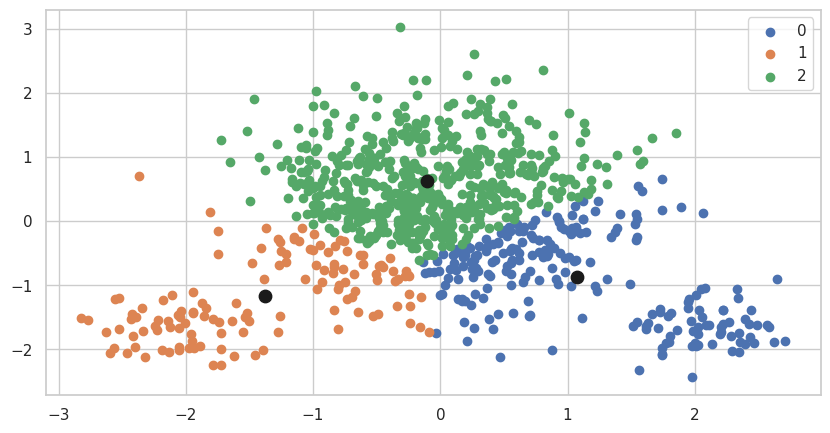

In [115]:
visualize_clusters(skewed_df, 3)

----

In [116]:
subclusters_df = StandardScaler().fit_transform(subclusters_df[['x1', 'x2']])

 For k 0: value is 1.3832376750004516
 For k 1: value is 0.7038379687231631
 For k 2: value is 0.41172525913075214
 For k 3: value is 0.27106744701236274
 For k 4: value is 0.21931678260409795
 For k 5: value is 0.2048333081659128
 For k 6: value is 0.19058559118011165
 For k 7: value is 0.17994802775358348
 For k 8: value is 0.16730474427071002


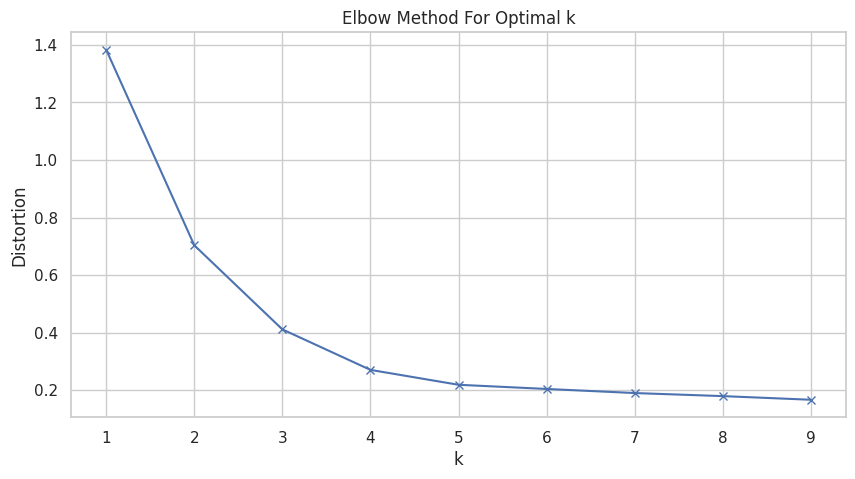

In [117]:
elbow(subclusters_df, "k-means++")

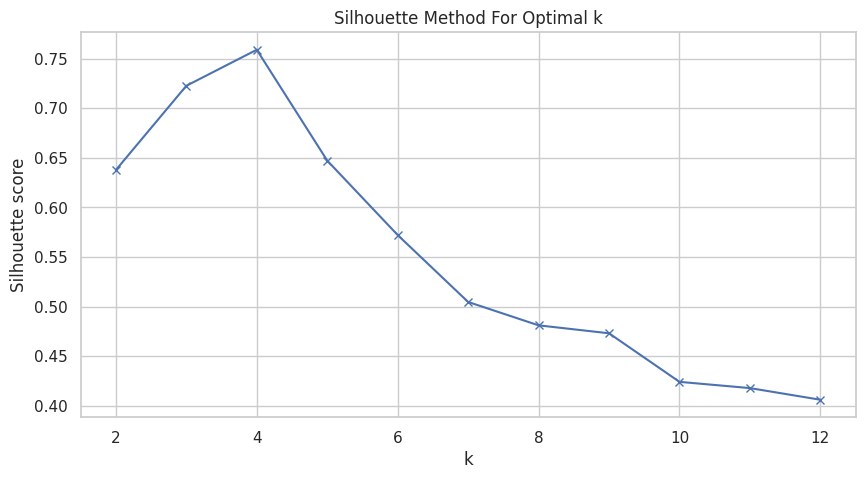

In [118]:
silhouette(subclusters_df, "k-means++")

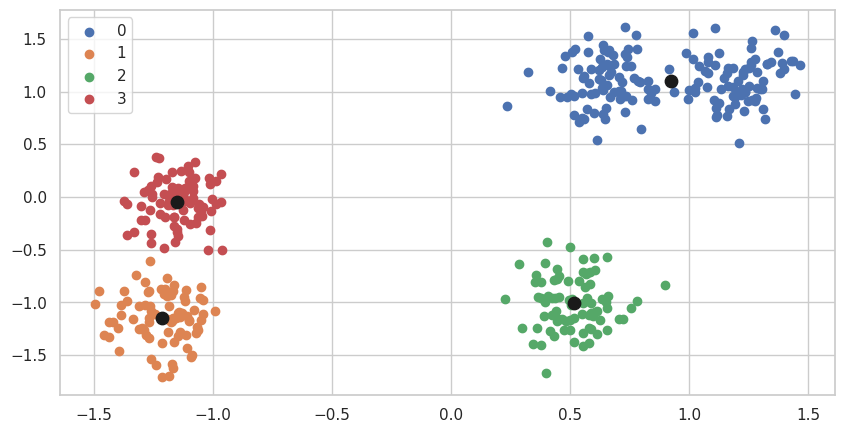

In [119]:
visualize_clusters(subclusters_df, 4)

----

In [120]:
wellSeparated_df = StandardScaler().fit_transform(wellSeparated_df[['x1', 'x2']])

 For k 0: value is 1.3418177889667882
 For k 1: value is 0.8919143023578265
 For k 2: value is 0.5413871605474102
 For k 3: value is 0.4964399492060951
 For k 4: value is 0.45428705760462207
 For k 5: value is 0.41714591542503177
 For k 6: value is 0.39167146760638155
 For k 7: value is 0.3614874082086537
 For k 8: value is 0.33496628808644935


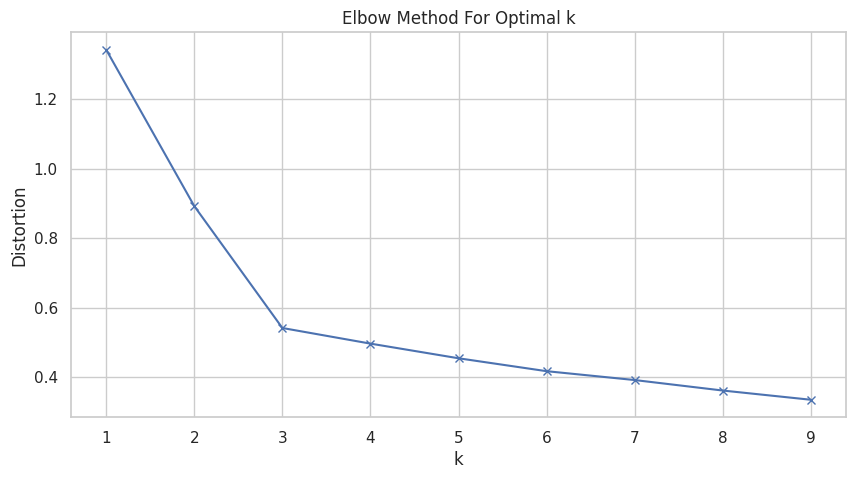

In [121]:
elbow(wellSeparated_df, "k-means++")

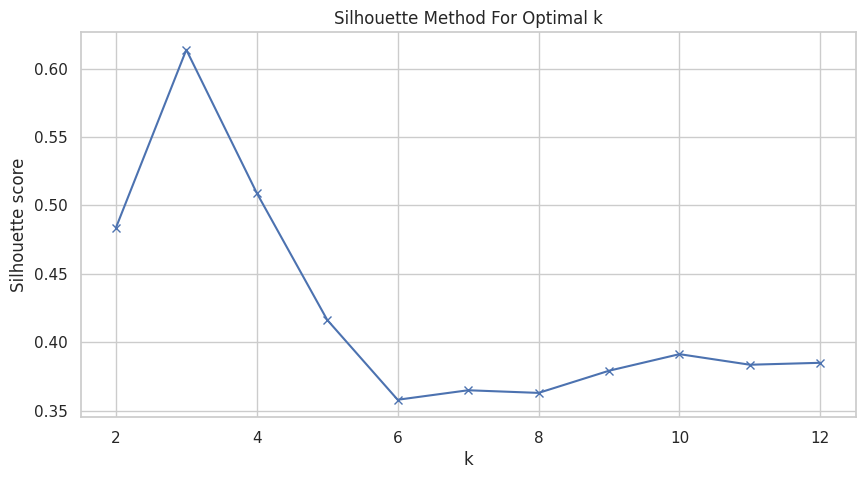

In [122]:
silhouette(wellSeparated_df, "k-means++")

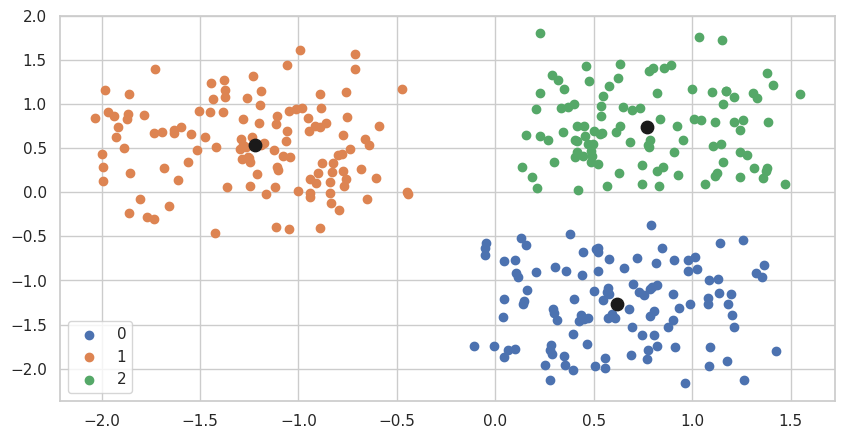

In [123]:
visualize_clusters(wellSeparated_df, 3)

----

### **3. Agglomerative Clustering**
    Hierarchical Clustering

In [124]:
# Let's implement hierarchical clustering

# Now, we can use optimal k (from dendogram) in Hierarchical clustering to get the cluster labels

def hierarchical_clustering(X, linkage_name, optimal_k):

    cluster_model = AgglomerativeClustering(n_clusters=optimal_k, affinity='euclidean', linkage=linkage_name)
    cluster_model = cluster_model.fit(X)
    cluster_model.labels_

    '''
    we need to create an AgglomerativeClustering object, and in it, we pass the following parameters:
    n_cluster= optimal_k, the number of clusters our model should return
    affinity = euclidean, specify metric to be used to calculate distances
    linkage= Single/Complete to regulate how distance calculation will be carried out between different clusters.
    '''
    Agg_hc = AgglomerativeClustering(n_clusters = optimal_k, affinity = 'euclidean', linkage = linkage_name)
    y_hc = Agg_hc.fit_predict(X) # model fitting on the dataset

    # plotting cluster 1
    plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
    plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
    plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
    plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
    plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
    plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 100, c = 'orange', label = 'Cluster 6')
    
    # plot title addition
    plt.title('Clusters')
    # labelling the x-axis
    plt.xlabel('')
    # label of the y-axis
    plt.ylabel('')
    # printing the legend
    plt.legend()
    # show the plot
    plt.show()

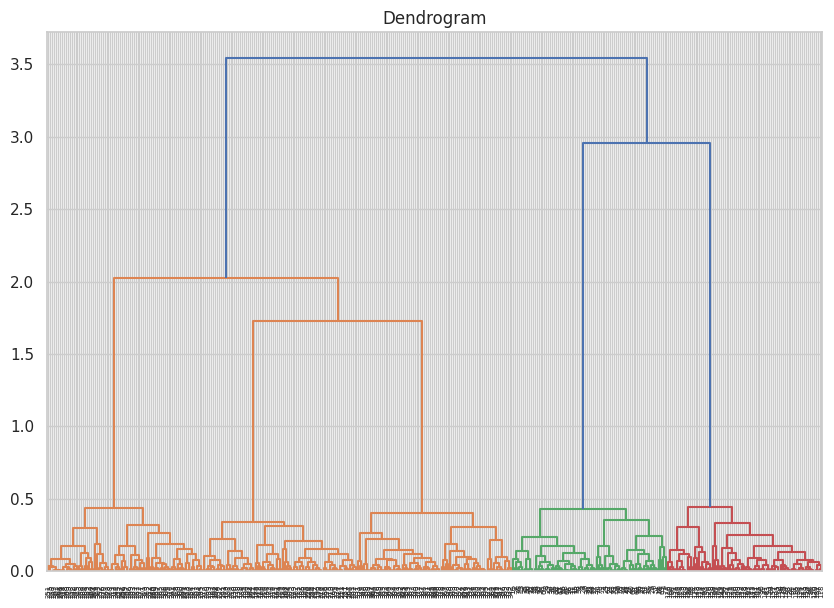

In [125]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(compact_df, method='complete'))
# suggests 3 clusters

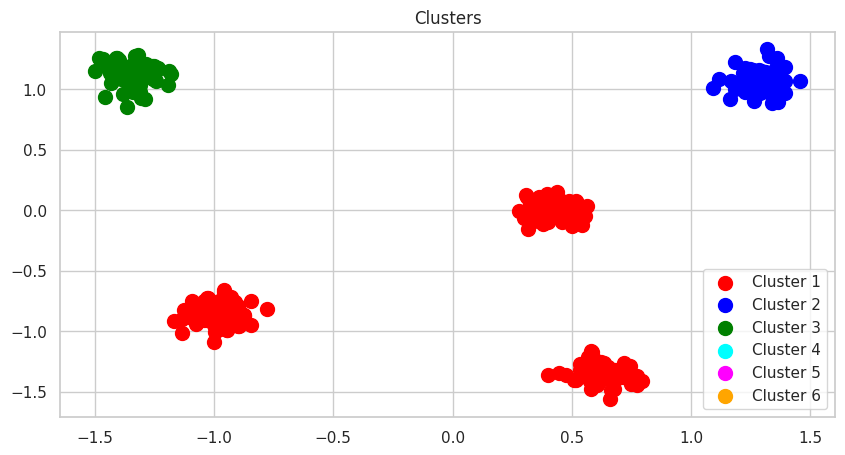

In [126]:
hierarchical_clustering(compact_df, 'complete', 3)

----

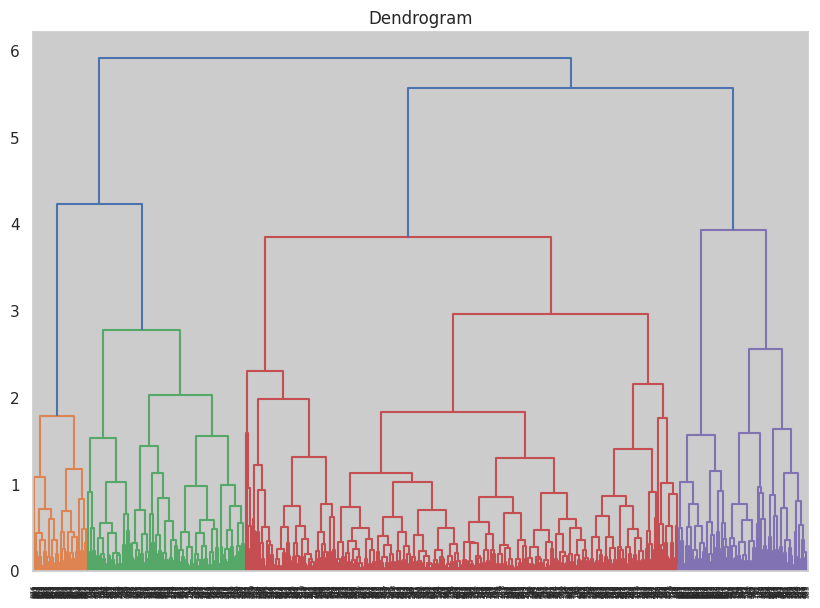

In [127]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(skewed_df, method='complete'))

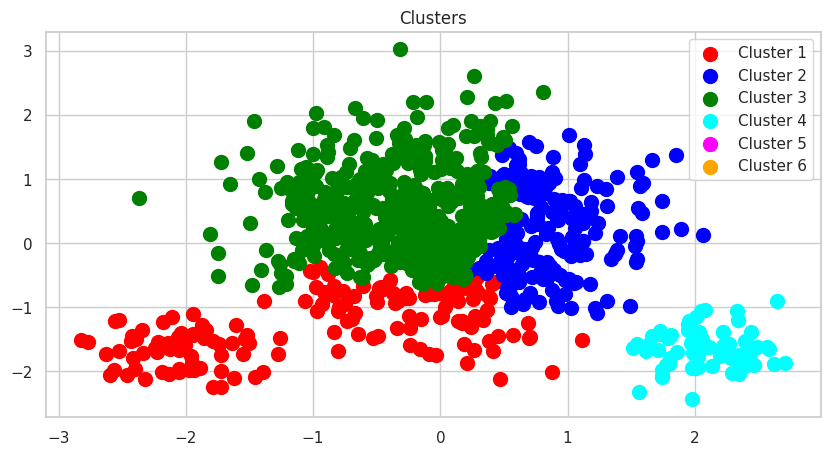

In [128]:
hierarchical_clustering(skewed_df, 'complete', 4)

----

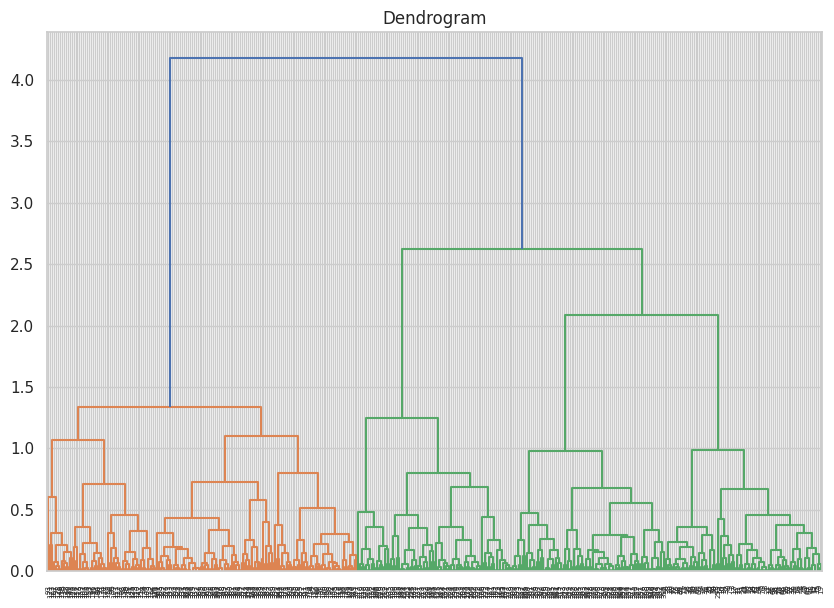

In [129]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(subclusters_df, method='complete'))

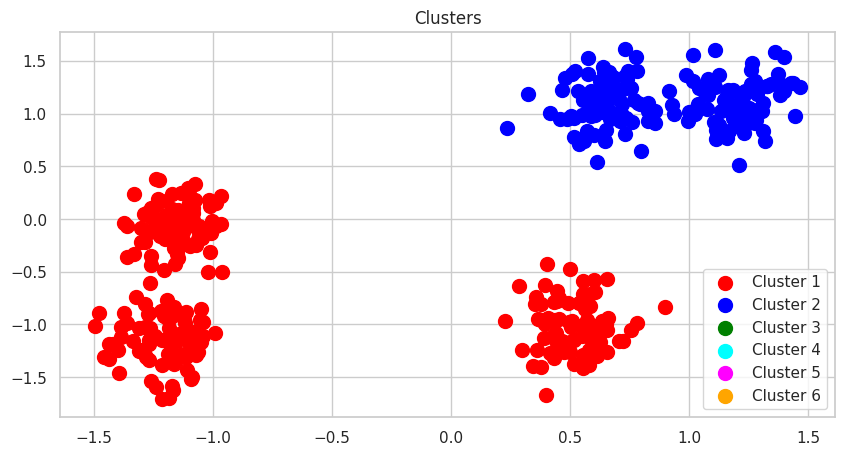

In [130]:
hierarchical_clustering(subclusters_df, 'complete', 2)

----

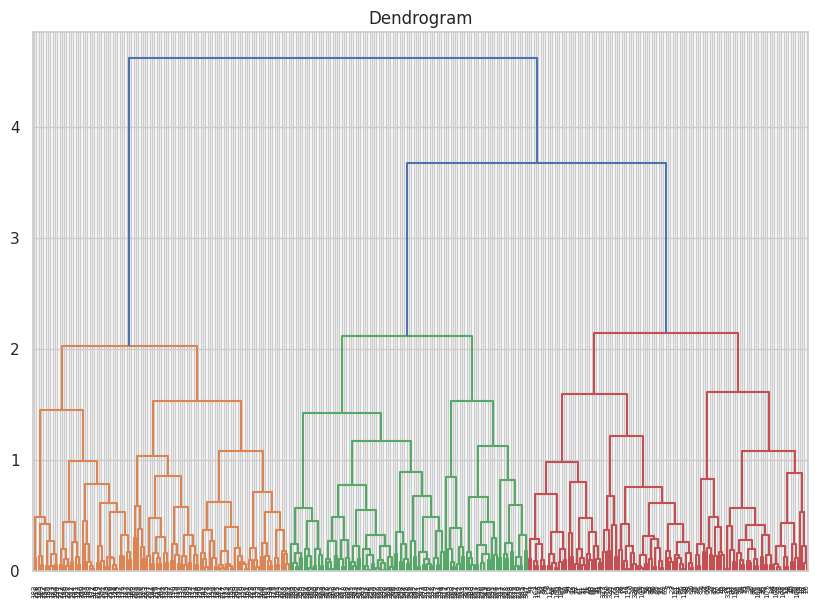

In [131]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(wellSeparated_df, method='complete'))

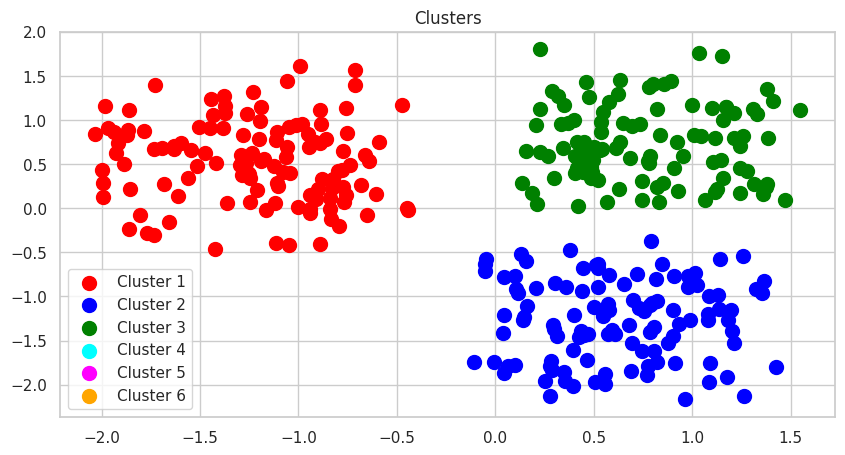

In [132]:
hierarchical_clustering(wellSeparated_df, 'complete', 3)

----

### **4. DBSCAN Clustering**

In [153]:
compact_df = pd.read_csv(f"Dataset/Dataset2/Compact.csv")
skewed_df = pd.read_csv(f"Dataset/Dataset2/Skewed.csv")
subclusters_df = pd.read_csv(f"Dataset/Dataset2/Subclusters.csv")
wellSeparated_df = pd.read_csv(f"Dataset/Dataset2/wellSeperated.csv")

In [161]:
# Numpy array of all the cluster labels assigned to each data point 
#Plotting the clusters
def dbscan_visual(compact_df, eps_ls=[1.0,2.0,3.0,4.0,5.0]):
    color_scheme = {-1:'black', 0: 'blue', 1:'green', 2:'red', 3:'cyan', 4:'magenta', 5:'yellow', 6:'orange',7:'pink', 8:'brown', 9:'purple', 10:'gray', 11:'olive'}
    def viz_clusters(labels, compact_df):
        for i in np.unique(labels):
            idxs = np.where(labels == i)
            plt.title(f"eps = {eps}")
            plt.scatter(compact_df.loc[idxs , 'x1'] , compact_df.loc[idxs , 'x2'] , c = color_scheme[i])
        plt.show()


    for eps in eps_ls:
        print(eps)
        db_default = DBSCAN(eps = eps, min_samples =5).fit(compact_df) 
        labels = db_default.labels_ 
        viz_clusters(labels, compact_df)
        # labels_pure = [i for i in labels if i!=-1]
        # compact_arr_pure = []
        try:
            print(f"Silhouette_score: {silhouette_score(compact_df.to_numpy(),labels)}")
        except:
            continue

1.0


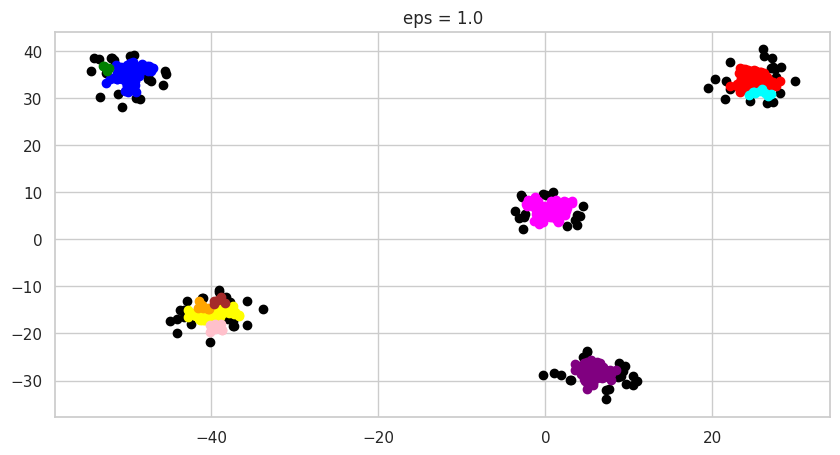

Silhouette_score: 0.18328716867842576
2.0


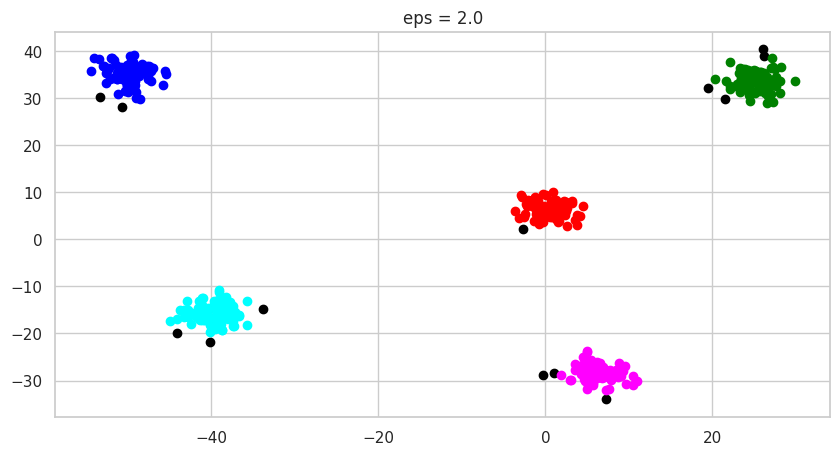

Silhouette_score: 0.8578823937050255
3.0


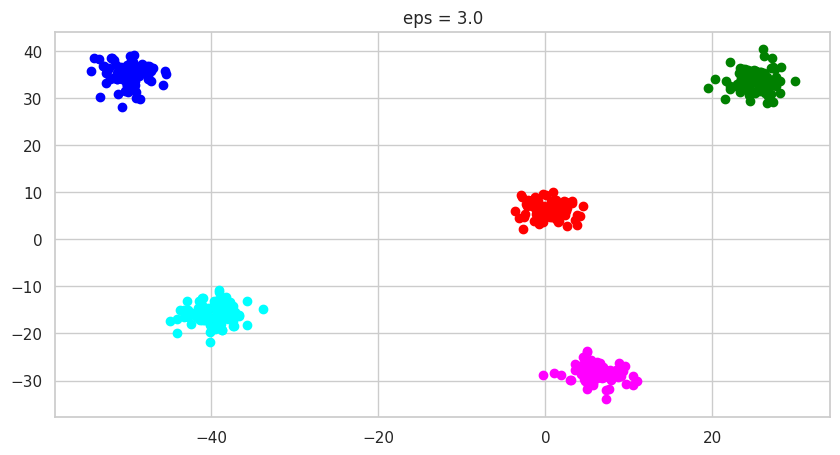

Silhouette_score: 0.9117799558033819
4.0


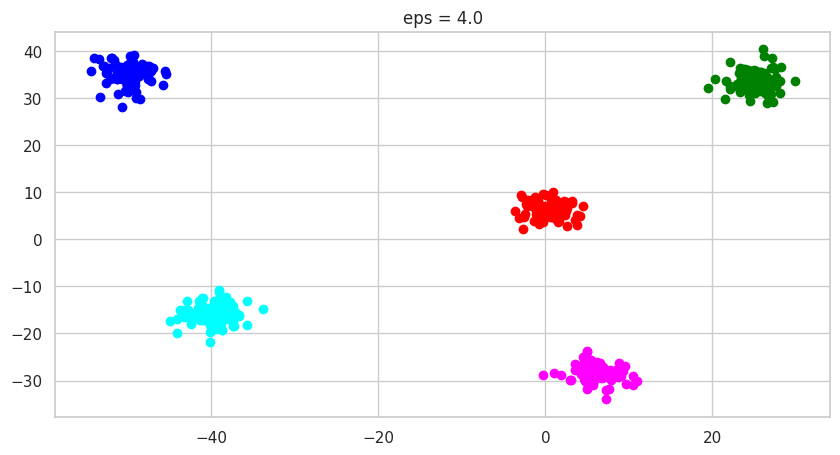

Silhouette_score: 0.9117799558033819
5.0


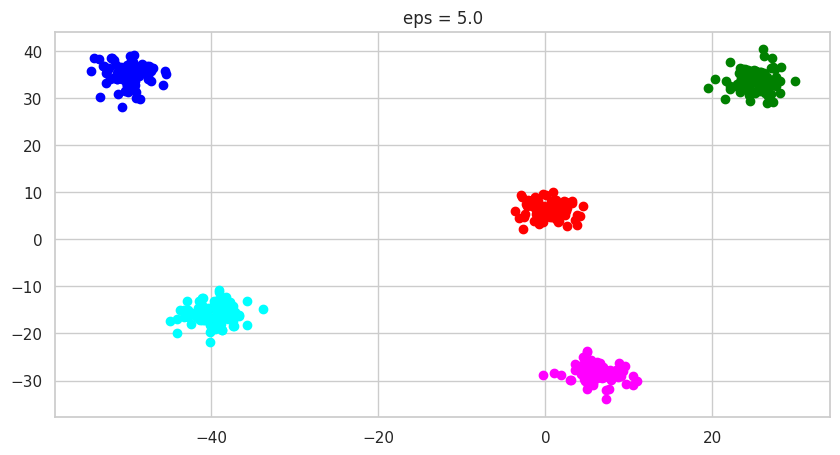

Silhouette_score: 0.9117799558033819


In [155]:
dbscan_visual(compact_df)

----

1.0


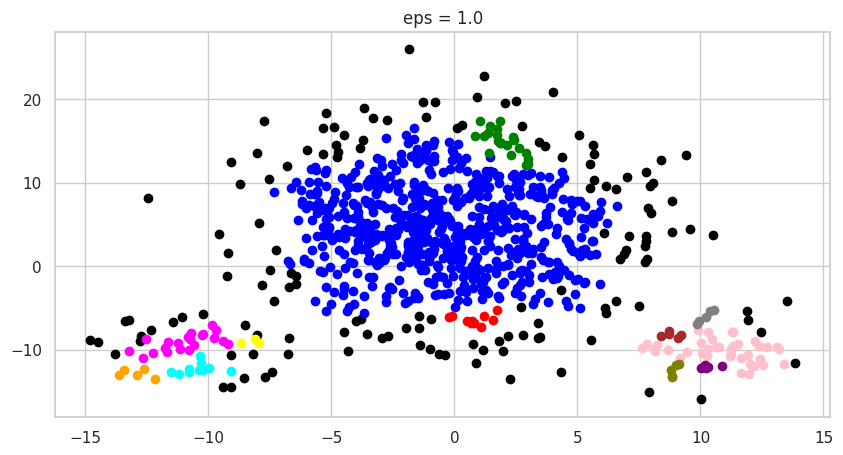

Silhouette_score: -0.008322232556526863
2.0


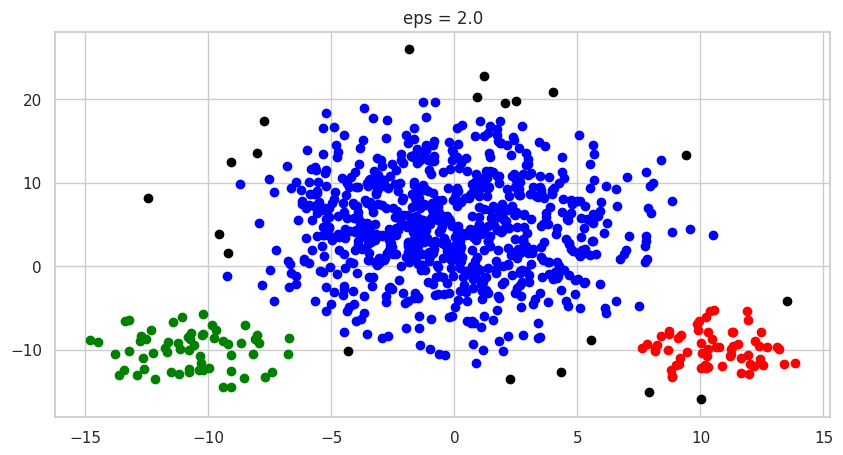

Silhouette_score: 0.423632279981603
3.0


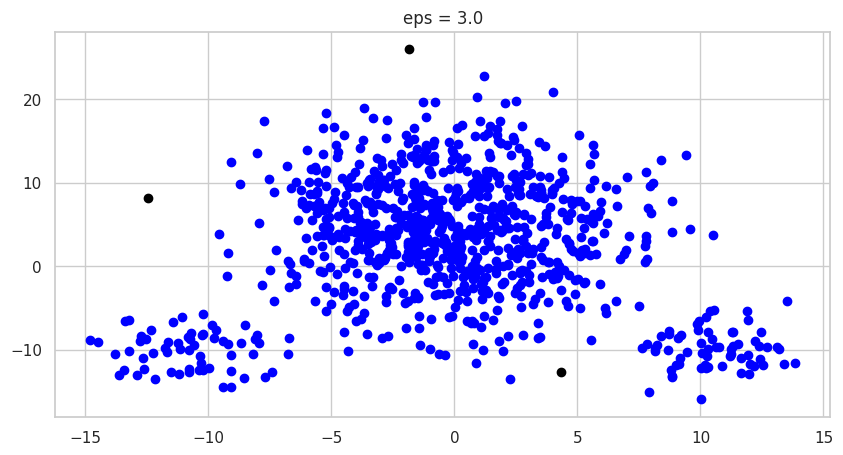

Silhouette_score: 0.4105393548092606
4.0


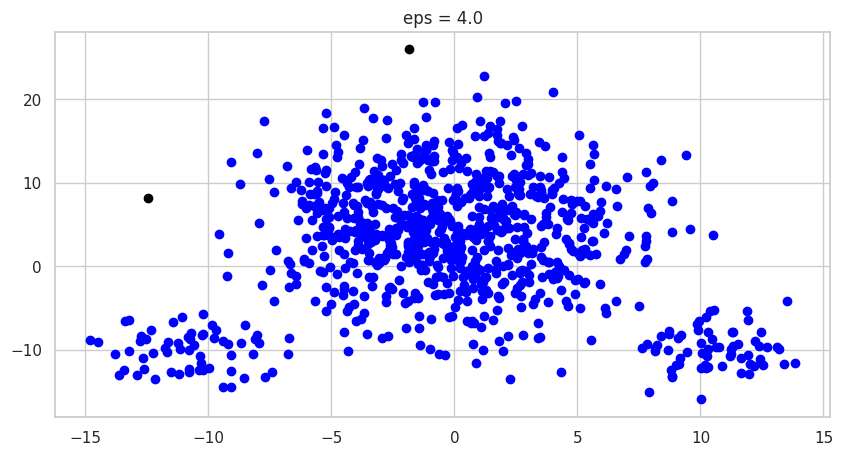

Silhouette_score: 0.39641319552135723
5.0


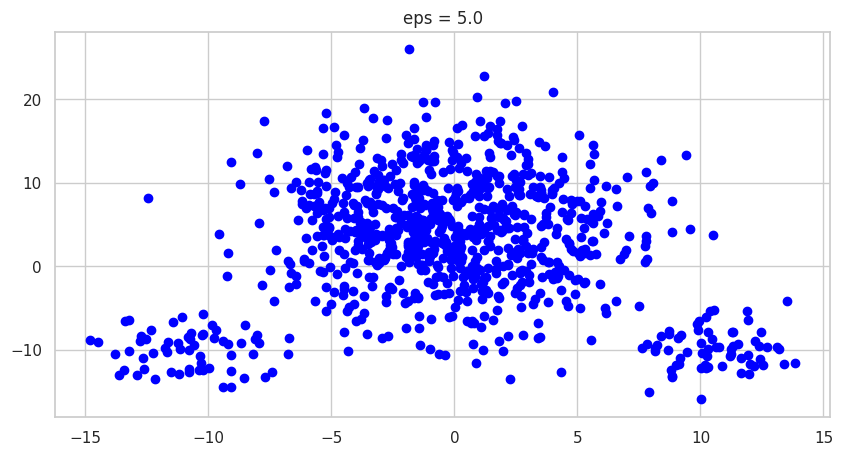

In [158]:
dbscan_visual(skewed_df)

----

1.0


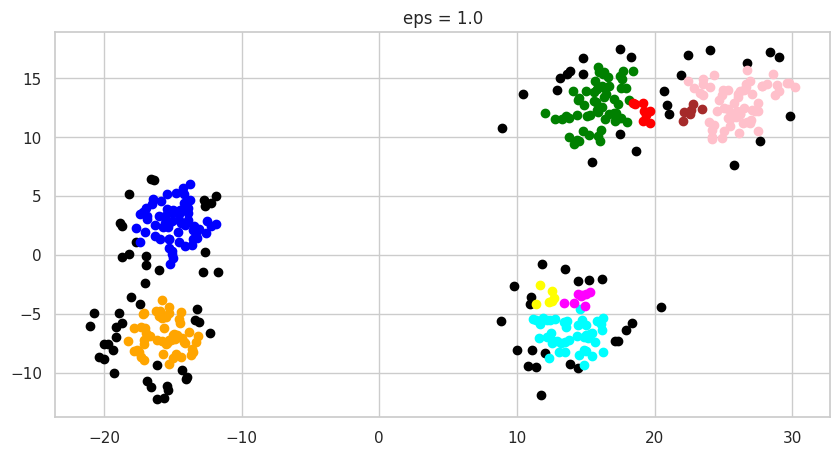

Silhouette_score: 0.1411356316497065
2.0


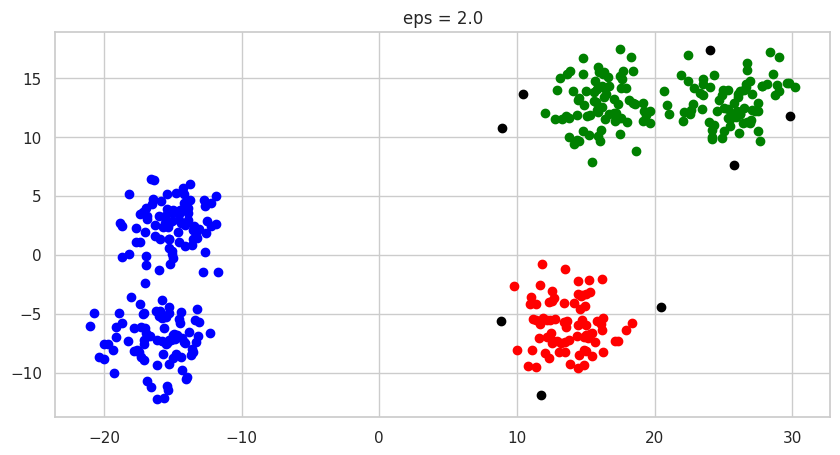

Silhouette_score: 0.655528535343529
3.0


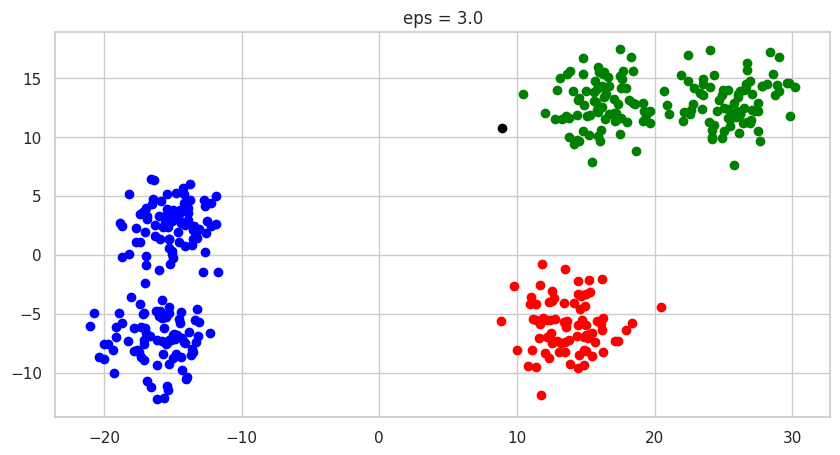

Silhouette_score: 0.5956965191573598
4.0


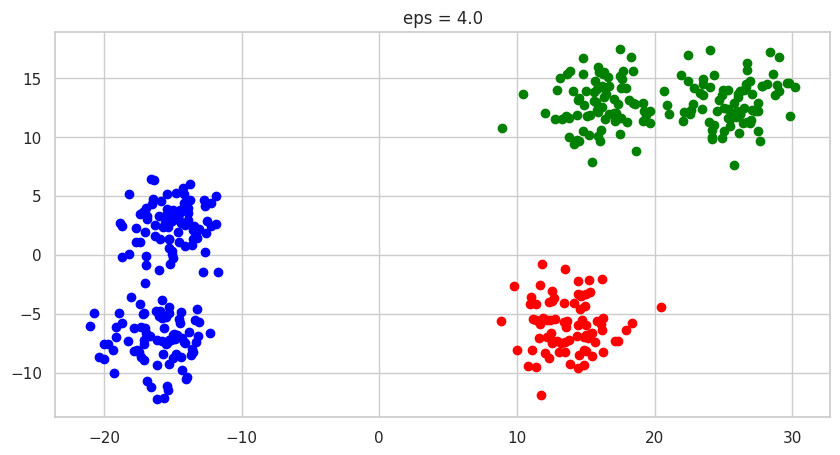

Silhouette_score: 0.738949032645643
5.0


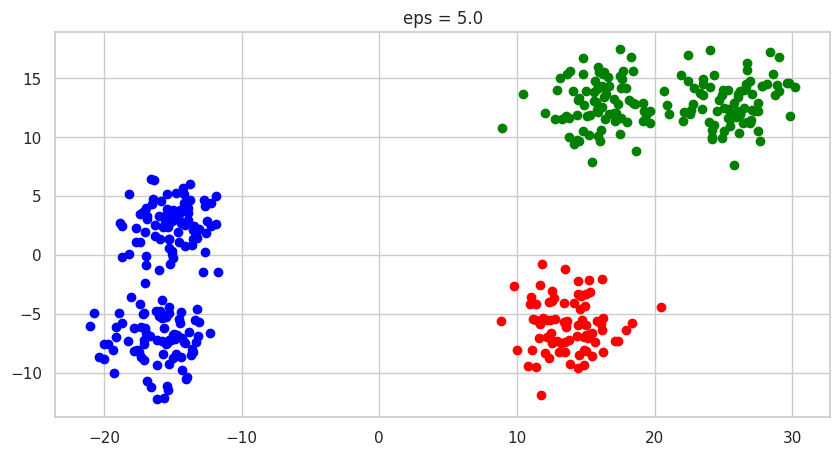

Silhouette_score: 0.738949032645643


In [159]:
dbscan_visual(subclusters_df)

----

15


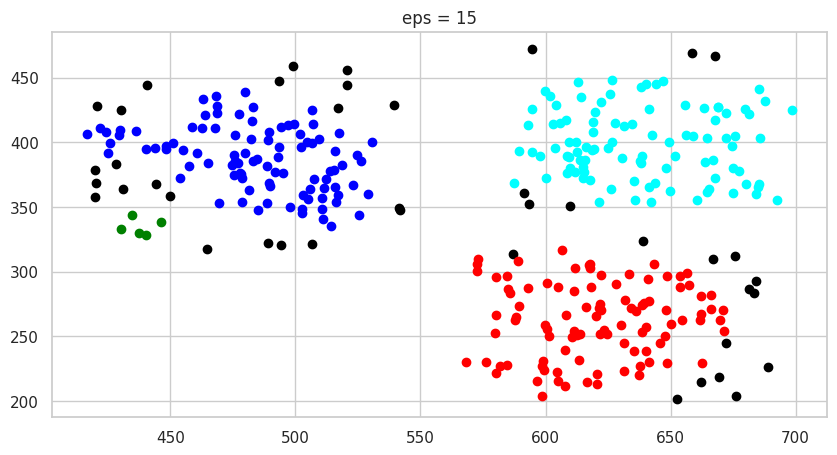

Silhouette_score: 0.41172295960043664
20


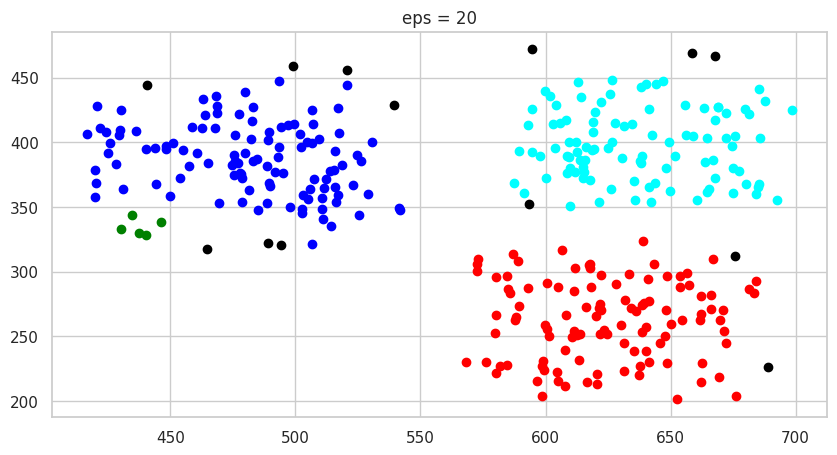

Silhouette_score: 0.45321420103274696
25


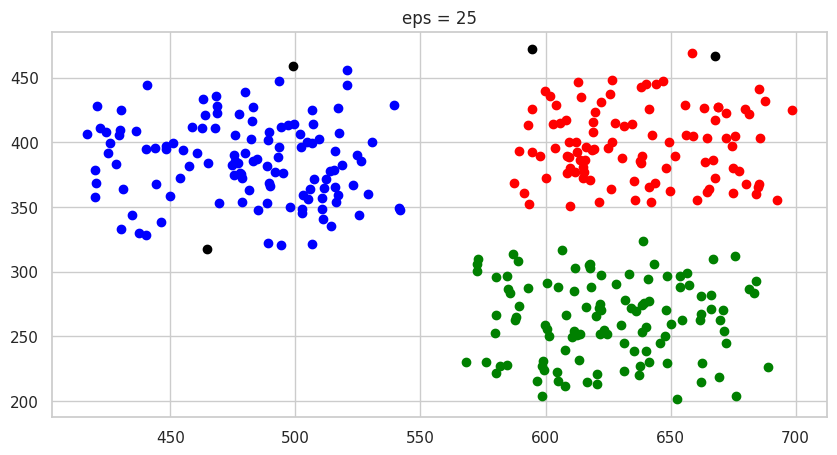

Silhouette_score: 0.5578407736960249
30


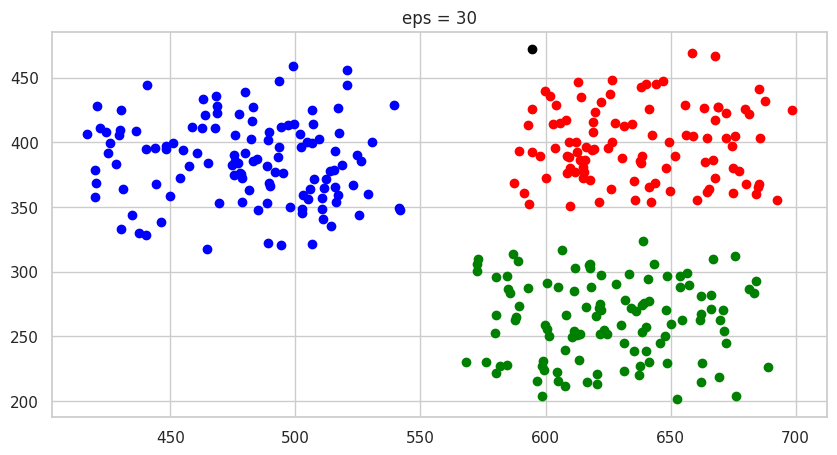

Silhouette_score: 0.5143718973646519


In [165]:
eps_ls=[15,20,25,30]
dbscan_visual(wellSeparated_df, eps_ls=eps_ls)

----

`Analyze which algorithm performs the best for each and every data and also
mention the reason if an algorithm fails for a particular data.`

### Kmeans:
- **Compact DF:** On comparison with the plotted data, KMeans gives 5 cluters which is visually verifiable.

- **Skewed DF:** Although KMeans gives the correct number of clusters(3), it makes errors during cluster formation as the clusters are non-spherical.

- **Subcluster DF:** KMeans gives 4 clusters. 

- **WellSeperated DF:** KMeans gives 3 clusters, which is visually verifiable.

### Agglomerative Clustering:
- **Compact DF:** Agglomerative clustering gives us 3 clusters.

- **Skewed DF:** Agglomerative clustering gives 4 clusters.

- **Subcluster DF:** Agglomerative clustering gives us 2 clusters. 

- **WellSeperated DF:** Agglomerative clustering gives us 3 clusters, which is visually verifiable.

### East or West DBSCAN is the best!!:
- By varying the eps values correctly, we obtain reasonable clusters from DBSCAN.